# Regret simulation

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Plot params
mpl.style.use("ggplot")
mpl.rcParams["axes.grid"] = True
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["figure.dpi"] = 85
mpl.rcParams["axes.labelsize"] = "large"
plt.rcParams["legend.framealpha"] = 0.9
w, h = plt.rcParams.get('figure.figsize')


In [3]:
def calc_pi_element_nf(p, x_t_g):
    return p / (p + (1 - p) * (p ** x_t_g))


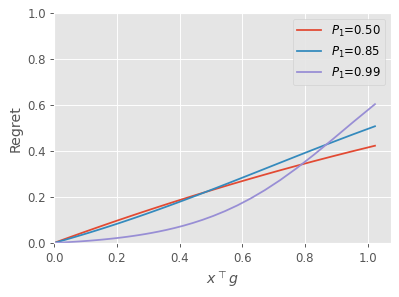

In [5]:
w, h = plt.rcParams.get("figure.figsize")
fig, ax = plt.subplots(1, 1, figsize=(0.75 * w, 0.75 * h))

x_t_g = np.logspace(-3, 0.01, 100)

for p_i in [0.5, 0.85, 0.99]:
    regrets = np.log(
        calc_pi_element_nf(p_i, x_t_g) + calc_pi_element_nf(1 - p_i, x_t_g)
    ) / np.log(2)
    plt.plot(x_t_g, regrets, label="$P_1$={:.2f}".format(p_i))
plt.legend()
plt.xlabel(r"$x^\top g$")
plt.ylabel("Regret")
plt.xlim(left=0.0)
plt.ylim(bottom=0.0, top=1.0)
plt.tight_layout()

os.makedirs("../outputs/visualizations", exist_ok=True)
plt.savefig("../outputs/visualizations/regret_simulation.pdf")
plt.show()
